# Exploratory Data Analysis on Pitchfork Album Review Dataset

In [145]:
import pandas as pd
import numpy as np
import sqlite3

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
%matplotlib inline

Connect to the database and query the tables:

In [146]:
con = sqlite3.connect('./data/database.sqlite')

# Query the 
artists = pd.read_sql('SELECT * FROM artists', con, index_col='reviewid')
content = pd.read_sql('SELECT * FROM content', con, index_col='reviewid')
genres = pd.read_sql('SELECT * FROM genres', con, index_col='reviewid')
labels = pd.read_sql('SELECT * FROM labels', con, index_col='reviewid')
reviews = pd.read_sql('SELECT * FROM reviews', con, index_col='reviewid')
years = pd.read_sql('SELECT * FROM years', con, index_col='reviewid')

# Sample table
genres.head()

,genre
reviewid,
22703,electronic
22721,metal
22659,rock
22661,rock
22725,electronic


Combine the tables into a single dataset:

In [147]:
df_1 = pd.merge(genres, reviews, on='reviewid')
df_2 = pd.merge(labels, df_1, on='reviewid')
df_3 = pd.merge(content, df_2, on='reviewid')
df = pd.merge(years, df_3, on='reviewid')

df.head(3)

,year,content,label,genre,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
reviewid,,,,,,,,,,,,,,,,
22703,1998.0,"“Trip-hop” eventually became a ’90s punchline,...",virgin,electronic,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
22721,2016.0,"Eight years, five albums, and two EPs in, the ...",hathenter,metal,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
22659,2016.0,Minneapolis’ Uranium Club seem to revel in bei...,static shock,rock,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017


Analysis on data shape, types and missing values:

In [132]:
df.shape

(26018, 16)

In [17]:
df.dtypes

year              float64
content            object
label              object
genre              object
title              object
artist             object
url                object
score             float64
best_new_music      int64
author             object
author_type        object
pub_date           object
pub_weekday         int64
pub_day             int64
pub_month           int64
pub_year            int64
dtype: object

In [22]:
df.isna().sum()

year               592
content              0
label               41
genre             2701
title                0
artist               0
score                0
best_new_music       0
author               0
author_type       5678
pub_weekday          0
pub_year             0
dtype: int64

Initial data cleaning:

In [148]:
# Drop unneeded columns
df.drop(['url','author_type','pub_date','pub_weekday','pub_day','pub_month'], axis=1, inplace=True)

# Drop duplicate IDs
df = df[~df.index.duplicated(keep='first')]

# Drop rows with NaN values
df.dropna(inplace=True)

# Parse data types 
df['year'] = df['year'].astype(int)
#df['pub_year'] = df['pub_year'].astype(int)

# Final data shape
df.shape

(15622, 10)

### Number of reviews per music genre:

In [134]:
df['genre'].value_counts()

rock            9182
electronic      1943
rap             1453
pop/r&b         1061
folk/country     564
experimental     561
metal            356
jazz             323
global           179
Name: genre, dtype: int64

## Time trend visualizations
#### Evolution of average scores given by year of album release

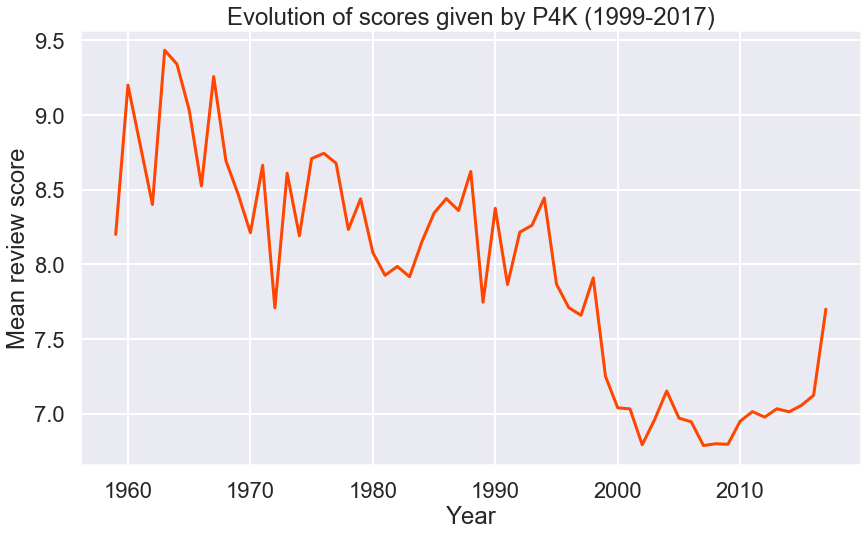

In [168]:
df_avg_by_year = df.groupby('year')['score'].mean()

plt.figure(figsize=(14,8))
sns.lineplot(data=df_avg_by_year, color='orangered')
sns.set_style('darkgrid')

# Settings 
plt.title('Evolution of scores given by P4K (1999-2017)')
plt.xlabel('Year');
plt.ylabel('Mean review score');
plt.xticks(rotation=0);

#### Evolution of Best New Music (BNM) tagged reviews given by year of album release

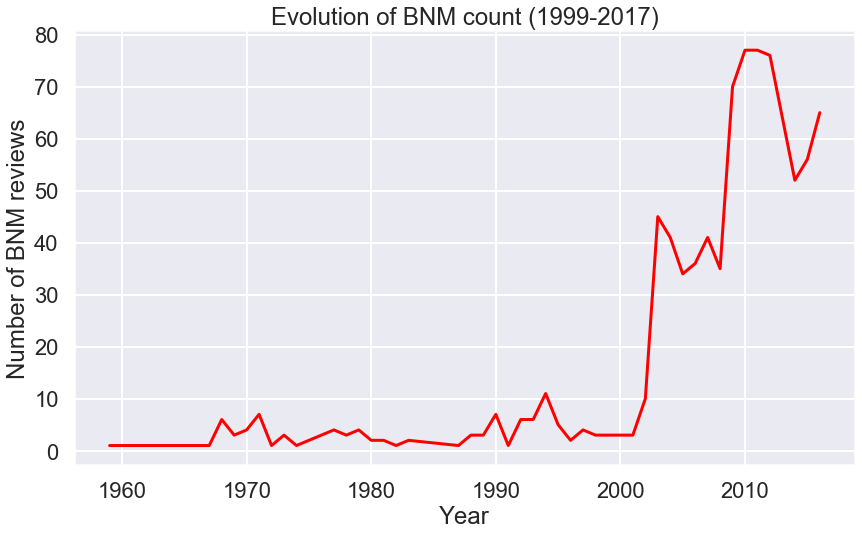

In [161]:
df_bnm_by_year = df[df.best_new_music == 1.0].groupby('year')['score'].count()

plt.figure(figsize=(14,8))
sns.lineplot(data=df_bnm_by_year, color='red')
sns.set_style('darkgrid')

# Settings 
plt.title('Evolution of BNM count (1999-2017)')
plt.xlabel('Year');
plt.ylabel('Number of BNM reviews');
plt.xticks(rotation=0);

The evolution shows that from 2000 onwards the average scores decrease, even though the number of **BNM** tags contradicts this trend. This number steadily increases after 2000, peaking at 2010 - in which close to 80 albums were tagged **BNM**.

## Bar plot analysis by genre
#### Bar plot of average review score per music genre:

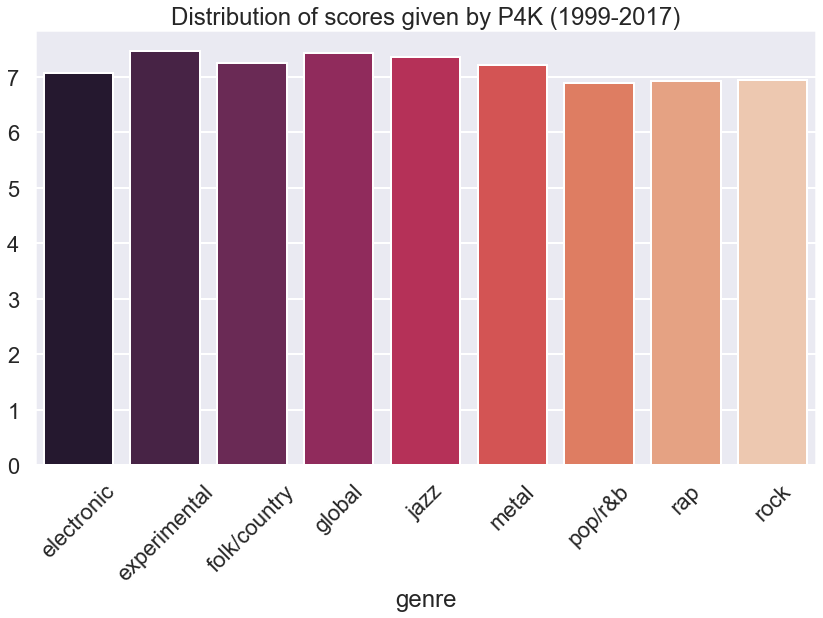

In [162]:
df_avg_by_genre = df.groupby('genre')['score'].mean()

plt.figure(figsize=(14,8))
plt.title("Distribution of scores given by P4K (1999-2017)")
sns.barplot(x=df_avg_by_genre.index, y=df_avg_by_genre.values, palette="rocket");
plt.xticks(rotation=45);

#### Bar plot of BNM reviews per music genre:

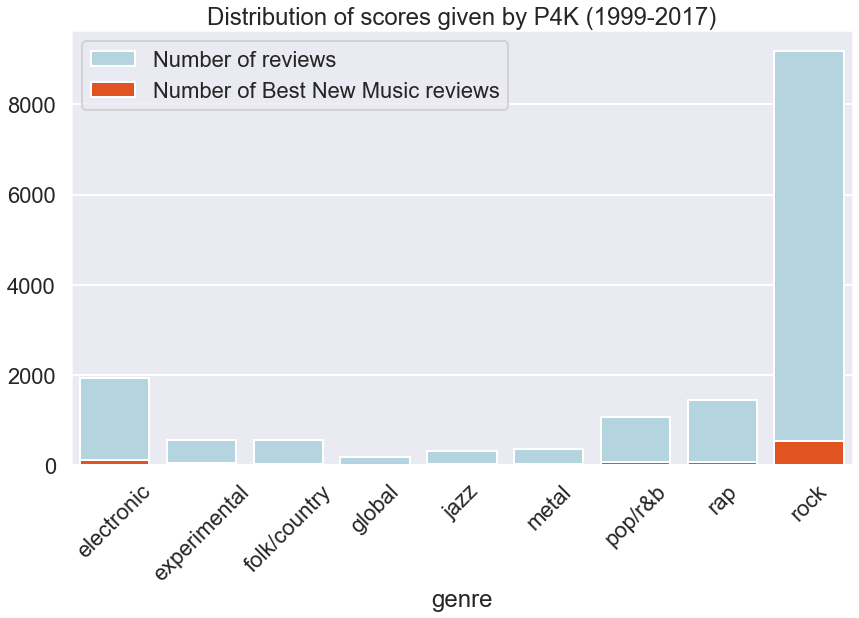

In [163]:
df_count_by_genre = df.groupby('genre')['score'].count()
df_bnm_by_genre = df[df.best_new_music == 1].groupby('genre')['score'].count()

plt.figure(figsize=(14,8))
plt.title("Distribution of scores given by P4K (1999-2017)")
sns.barplot(x=df_count_by_genre.index, y=df_count_by_genre.values, color='lightblue', label='Number of reviews');
sns.barplot(x=df_bnm_by_genre.index, y=df_bnm_by_genre.values, color='orangered', label='Number of Best New Music reviews');

plt.legend()
plt.xticks(rotation=45);

The results show that most album reviews written by P4K during the sample period were rock reviews. The rock genre also had the largest number of 'Best New Music' tags.

## Statistical Data Analysis

#### Summary descriptive statistics

In [164]:
df.describe()

,year,score,best_new_music,pub_year
count,15622.000000,15622.000000,15622.000000,15622.000000
mean,2007.763667,7.006696,0.056779,2008.799321
std,6.764569,1.296093,0.231427,4.519919
min,1959.000000,0.000000,0.000000,1999.000000
25%,2005.000000,6.400000,0.000000,2005.000000
50%,2008.000000,7.200000,0.000000,2009.000000
75%,2012.000000,7.800000,0.000000,2013.000000
max,2017.000000,10.000000,1.000000,2017.000000


#### Distribution of the scores given by P4K

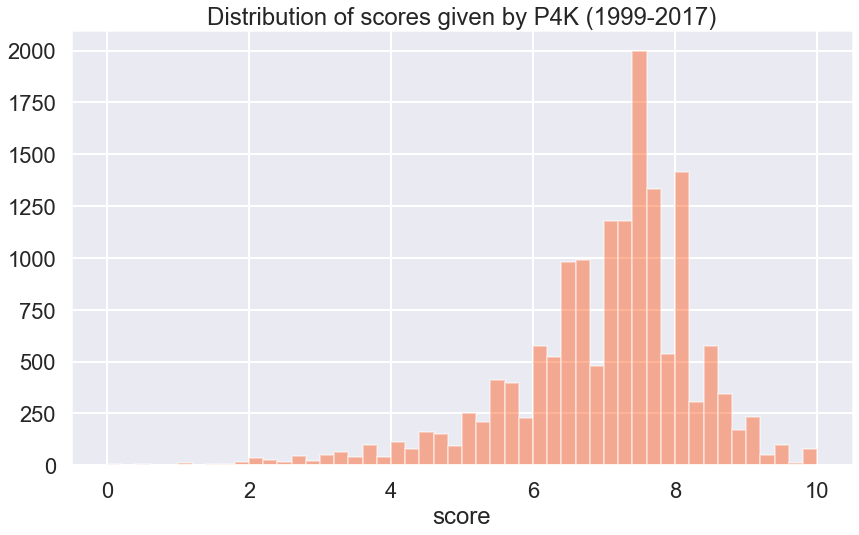

In [165]:
plt.figure(figsize=(14,8))
plt.title("Distribution of scores given by P4K (1999-2017)")

sns.distplot(a=df['score'], color='orangered', kde=False);

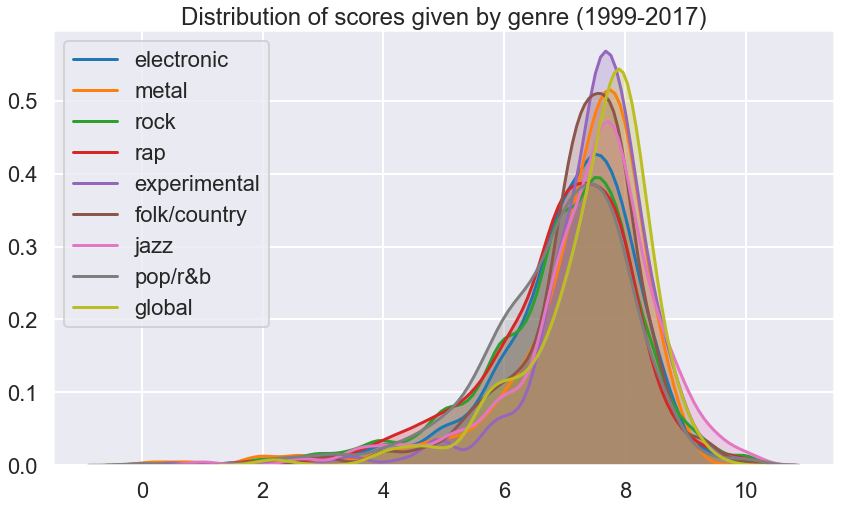

In [166]:
plt.figure(figsize=(14,8))
plt.title("Distribution of scores given by genre (1999-2017)")

for g in df['genre'].unique():
    sns.kdeplot(data=df.loc[df.genre == g, 'score'], label=g, shade=True)


#### Box plot

The box plot displays the distribution of the data, beyond the simple central tendency measures given by the summary statistics. The results show that both the experimental and folk albums are more tighlty grouped, showing less variability.

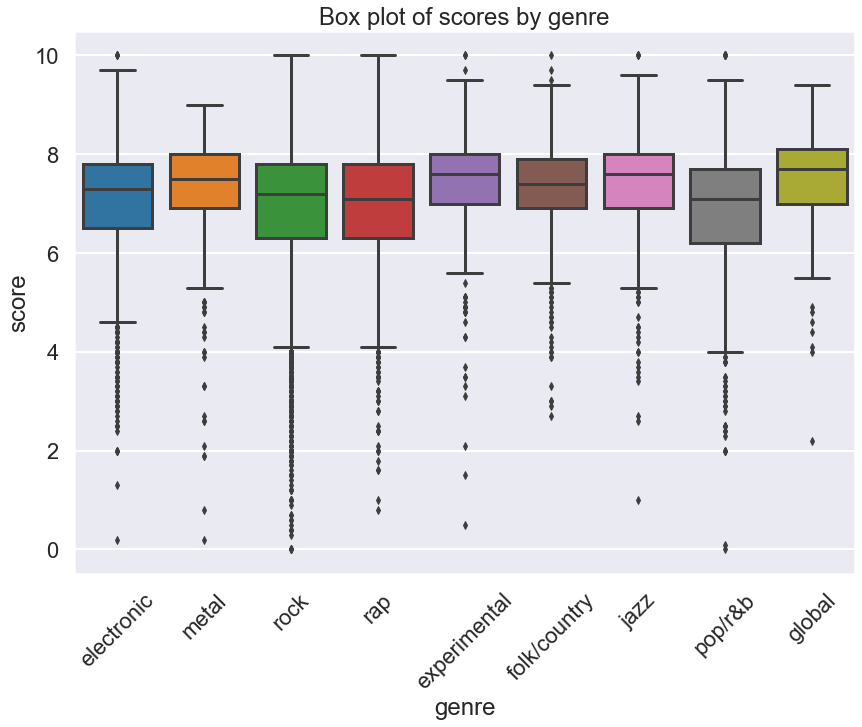

In [167]:
plt.figure(figsize=(14,10))
plt.title("Box plot of scores by genre")
sns.boxplot(x='genre', y='score', data=df);
plt.xticks(rotation=45);